# Computational Drug Discovery Pipeline for c-Myc-Max and N-Myc-Max inhibitors of DNA binding and transcriptional activity

![CADD_Pipeline](images/CADD_Platform.png)

![Targeting_Myc-Max_Identical_Binding_Site_DNA_interface](images/Targeting_Myc-Max_Identical_Binding_Site_DNA_interface.png)

![Myc-Max_DNA_interactions](images/Myc-Max_DNA_interactions.png)

# Development of 70551 Lead Myc-Max Inhibitor

## Optimization Pathway 70033 -> 70127 -> 70551

![70551_development_pathway](images/70551_development_pathway.png)

In [1]:
import os
import pandas as pd                 # Dealing with data in tables
import numpy as np
from rdkit import Chem              # RDKit libraries for chemistry functions
from rdkit.Chem import Draw         # Drawing chemical structures
from rdkit.Chem import PandasTools  # Manipulating chemical data
from rdkit.Chem.Scaffolds import MurckoScaffold

#load dataset
dataset_file = os.path.join('.', 'myc_compounds.csv')
df = pd.read_csv(dataset_file)

,id,smiles,Mol,core_smiles,Scaffold,IC50 (µM)
0,70033,Clc1c(C(F)(F)F)cc([N+](=O)[O-])c(Nc2ccc(NC(=O)...,,c1ccc(Nc2ccccc2)cc1,,10
1,70127,FC(F)(F)c1cc([N+](=O)[O-])c(NNC(=O)c2nccnc2)cc1,,O=C(NNc1ccccc1)c1cnccn1,,1
2,70545,FC(F)(F)c1cc(C(=O)NNc2c(F)c(F)c(F)cc2)ccc1,,O=C(NNc1ccccc1)c1ccccc1,,
3,70546,FC(F)(F)c1c(NNC(=O)c2ccc(C(=O)N(C)C)cc2)cccc1,,O=C(NNc1ccccc1)c1ccccc1,,
4,70551,FC(F)(F)c1c(NNC(=O)c2ccc(C(F)(F)F)cc2)ccc(C#N)c1,,O=C(NNc1ccccc1)c1ccccc1,,4

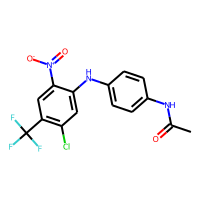
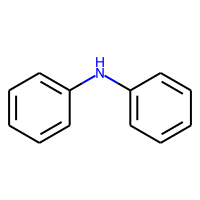
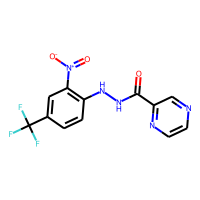
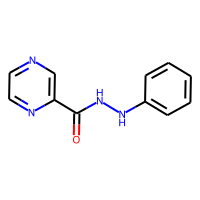
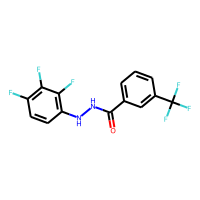
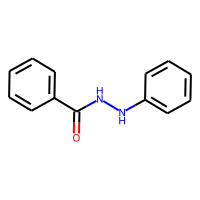
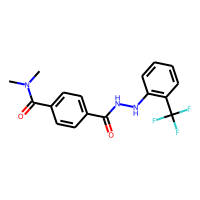
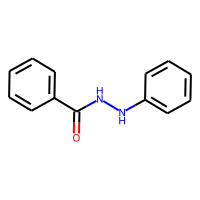
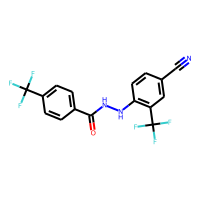
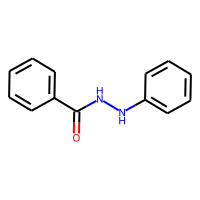

In [2]:
PandasTools.AddMoleculeColumnToFrame(df, 'smiles', 'Mol')
df_opt = df.loc[df['id'].isin([70033, 70127, 70545, 70546, 70551])]
df_opt = df_opt.reset_index(drop=True)

mol_list = df_opt["Mol"]
core_smiles = [Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(m)) for m in mol_list]
df_opt['core_smiles'] = core_smiles
PandasTools.AddMoleculeColumnToFrame(df_opt, 'core_smiles', 'Scaffold')
df_opt.loc[:, 'IC50 (µM)'] = [10, 1, '', '', 4]
df_opt

### 70127 structural analysis, predicted metabolism, and biological profile

70127 distant analog of initial hit 70033 with an novel chemical scaffold resulting from ROCS ligand-based chemical similarity searches

![70127_profile](images/70127_profile.png)

### Derivatives of 70127

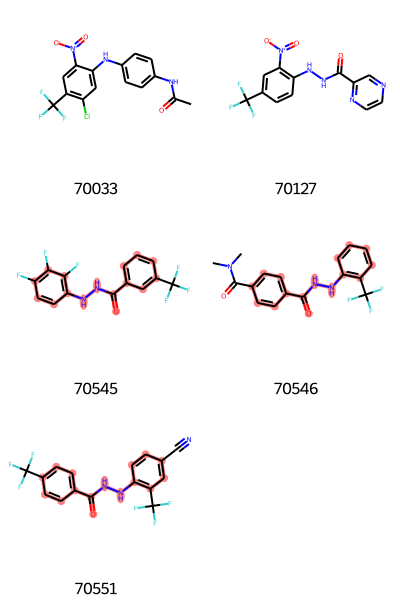

In [3]:
ids = df_opt["id"].astype({'id': 'string'}).tolist()
common_scaffold = Chem.MolFromSmiles('O=C(NNC1=CC=CC=C1)C1=CC=CC=C1')
match_list = [mol.GetSubstructMatch(common_scaffold) for mol in mol_list]
Draw.MolsToGridImage(mols=mol_list, molsPerRow=2, highlightAtomLists=match_list, legends=ids)

### Some evidence of SAR for the derivatives of 70127 resulting from substructure searches without the reactive nitro group and replacement of the metabolically vulnerable pyrazine ring 

The activities of the three analogs positively correlate with the pharmacophore RMSD values. The lower the RMSD, the higher the activity.
70551 shows best inhibition of Myc-Max transcriptional activity.

In [4]:
df_sar = pd.DataFrame({'id':[70551, 70545, 70546],
                      '% Inhibition transcriptional activity (@12.5 µM)':[98, 66, 58],
                      'RMSD pharmacophore (Å)':[0.60, 0.98, 1.23]})                      
df_sar

,id,% Inhibition transcriptional activity (@12.5 µM),RMSD pharmacophore (Å)
0,70551,98,0.60
1,70545,66,0.98
2,70546,58,1.23


### Potency, specificity and number of predicted metabolites comparison between 70127 and 70551

In [5]:
df_activ = pd.DataFrame({'id':[70127, 70551],
                      '% Non-specific cytotoxicity':[19, 10],
                      '# Predicted metabolites':[3, 0]})                      
df_activ

,id,% Non-specific cytotoxicity,# Predicted metabolites
0,70127,19,3
1,70551,10,0


### 70551 lead novel active scaffold

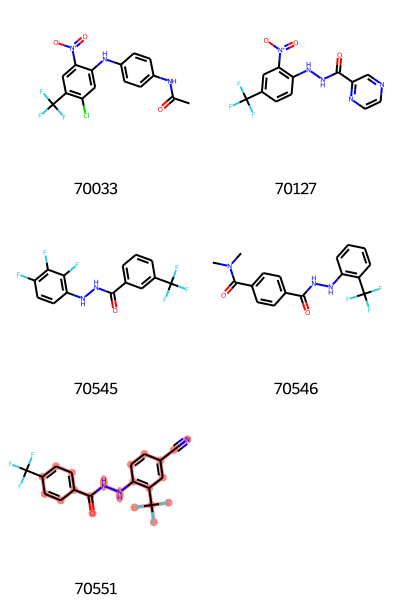

In [6]:
lead_active_scaffold = Chem.MolFromSmiles('FC(F)(F)C1=C(NNC(=O)C2=CC=CC=C2)C=CC(=C1)C#N')
match_list = [mol.GetSubstructMatch(lead_active_scaffold) for mol in mol_list]
Draw.MolsToGridImage(mols=mol_list, molsPerRow=2, highlightAtomLists=match_list, legends=ids)

## Structural determinants of 70551 binding affinity for c-Myc-Max site at the DNA interface and activity in models of castration-resistant prostate cancer (CRPC)

![70551_c-Myc-Max_CRPC](images/70551_c-Myc-Max_CRPC.png)

## 70551 identical binding affinity for the equivalent N-Myc-Max site at the DNA interface and same activity in models of neuroendocrine prostate cancer (NEPC)

![70551_N-Myc-Max_NEPC](images/70551_N-Myc-Max_NEPC.png)

## 70551 - moderately potent, specific and metabolically stable, with some evidence of SAR 

![70551_lead_inhibitor](images/70551_lead_inhibitor.png)

## 70551 competes with DNA for binding to Myc-Max dimer by mimicking DNA interactions with specific residues, mutations of which abrogate Myc-Max binding to DNA, matches the pharmacophore/hydrophobic core of the binding site and clashes with DNA

![70551_vs_DNA](images/70551_vs_DNA.png)